<a href="https://colab.research.google.com/github/yonandaputri/TA_GRNN/blob/master/GRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#Import Library
from sklearn.datasets import load_boston
import numpy as np
import matplotlib
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


> **LOAD DATA**


In [41]:
import pandas as pd
df = pd.read_excel("https://github.com/yonandaputri/TA_GRNN/raw/master/realestate.xlsx")
df.head()

,No,X1,X2,X3,X4,X5,X6,Y
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1




> **DROP 'NO' COLUMN**



In [42]:
# Preprocessing 
df = df.drop('No', axis = 1)
# df = df.drop('X5', axis = 1)
# df = df.drop('X6', axis = 1)
# df = df.drop('Y', axis = 1)
df = df.round({'X1': 3, 'X2': 1, 'X3': 1})
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.9,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.6,9,24.98034,121.53951,42.2
2,2013.583,13.3,562.0,5,24.98746,121.54391,47.3
3,2013.500,13.3,562.0,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.6,5,24.97937,121.54245,43.1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      414 non-null    float64
 1   X2      414 non-null    float64
 2   X3      414 non-null    float64
 3   X4      414 non-null    int64  
 4   X5      414 non-null    float64
 5   X6      414 non-null    float64
 6   Y       414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [44]:
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.883333,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.108060,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.400000,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.300000,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.200000,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.275000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.000000,10.000000,25.014590,121.566270,117.500000



> **PLOT 2D**


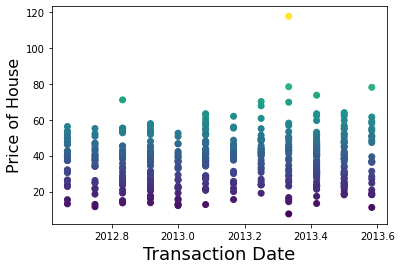

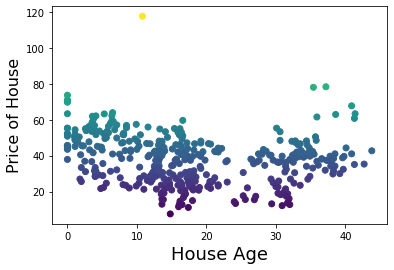

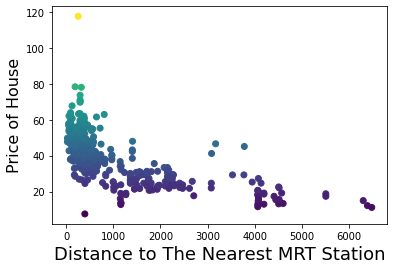

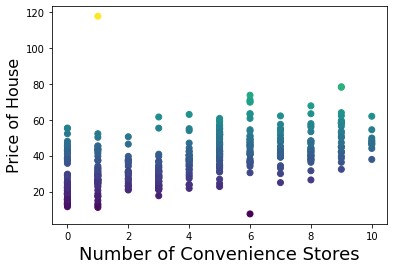

In [45]:
import matplotlib.pyplot as plt

td = df['X1']
ha = df['X2']
d = df['X3']
nc = df['X4']
harga = df['Y']


# PLOT Y = PRICE, X = TRANSACTION DATE
plt.scatter(td, harga, c=harga)
# plt.scatter(df.iloc[:, 0:8], df.iloc[:, 0:8], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Transaction Date', fontsize=18)
plt.ylabel('Price of House', fontsize=16)
plt.show()


# PLOT Y = PRICE, X = HOUSE AGE
plt.scatter(ha, harga, c=harga)
# plt.scatter(df.iloc[:, 0:8], df.iloc[:, 0:8], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('House Age', fontsize=18)
plt.ylabel('Price of House', fontsize=16)
plt.show()


# PLOT Y = PRICE, X = Distance to The Nearest MRT Station
plt.scatter(d, harga, c=harga)
# plt.scatter(df.iloc[:, 0:8], df.iloc[:, 0:8], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Distance to The Nearest MRT Station', fontsize=18)
plt.ylabel('Price of House', fontsize=16)
plt.show()


# PLOT Y = PRICE, X = Number of Convenience Stores in the Living Circle on Foot
plt.scatter(nc, harga, c=harga)
# plt.scatter(df.iloc[:, 0:8], df.iloc[:, 0:8], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Number of Convenience Stores', fontsize=18)
plt.ylabel('Price of House', fontsize=16)
plt.show()


> **PLOT 3D**

Text(0.5, 0, 'Price of House')

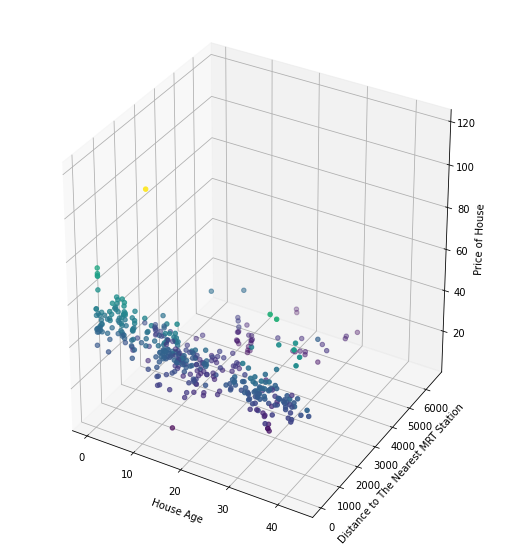

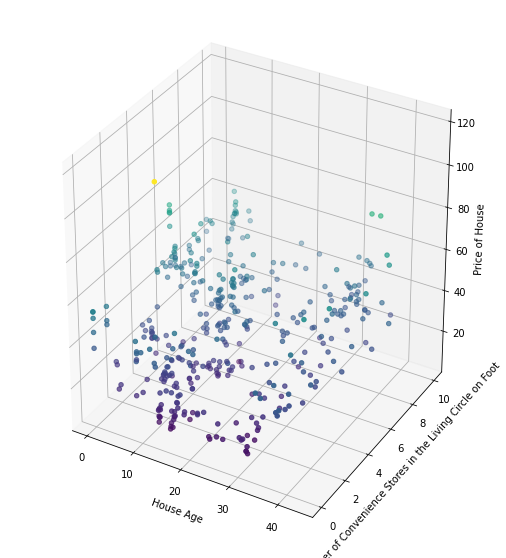

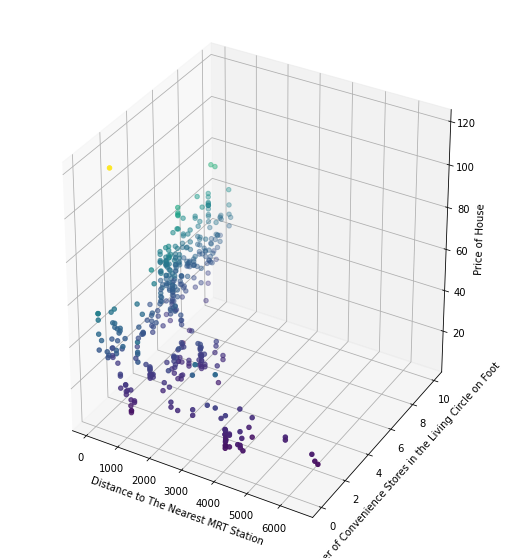

In [46]:
from mpl_toolkits.mplot3d import Axes3D



td = df['X1']
ha = df['X2']
d = df['X3']
nc = df['X4']
harga = df['Y']

# PLOT X = House Age, Y = Distance to The Nearest MRT Station, Z = Price
fig = plt.figure(figsize=[30,10])
ax = fig.add_subplot(131, projection='3d')
ax.scatter(ha, d, harga, c=harga, marker='o')
ax.set_xlabel('House Age')
ax.set_ylabel('Distance to The Nearest MRT Station')
ax.set_zlabel('Price of House')

# PLOT X = House Age, Y = Number of Convenience Stores, Z = Price
fig = plt.figure(figsize=[30,10])
ax = fig.add_subplot(132, projection='3d')
ax.scatter(ha, nc, harga, c=harga, marker='o')
ax.set_xlabel('House Age')
ax.set_ylabel('Number of Convenience Stores in the Living Circle on Foot')
ax.set_zlabel('Price of House')

# PLOT X = Distance to The Nearest MRT Station, Y = Number of Convenience Stores, Z = Price
fig = plt.figure(figsize=[30,10])
ax = fig.add_subplot(133, projection='3d')
ax.scatter(d, nc, harga, c=harga, marker='o')
ax.set_xlabel('Distance to The Nearest MRT Station')
ax.set_ylabel('Number of Convenience Stores in the Living Circle on Foot')
ax.set_zlabel('Price of House')

In [47]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2,0.017549,1.000000,0.025620,0.049593,0.054420,-0.048520,-0.210567
X3,0.060880,0.025620,1.000000,-0.602516,-0.591066,-0.806317,-0.673610
X4,0.009635,0.049593,-0.602516,1.000000,0.444143,0.449099,0.571005
X5,0.035058,0.054420,-0.591066,0.444143,1.000000,0.412924,0.546307
X6,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y,0.087491,-0.210567,-0.673610,0.571005,0.546307,0.523287,1.000000


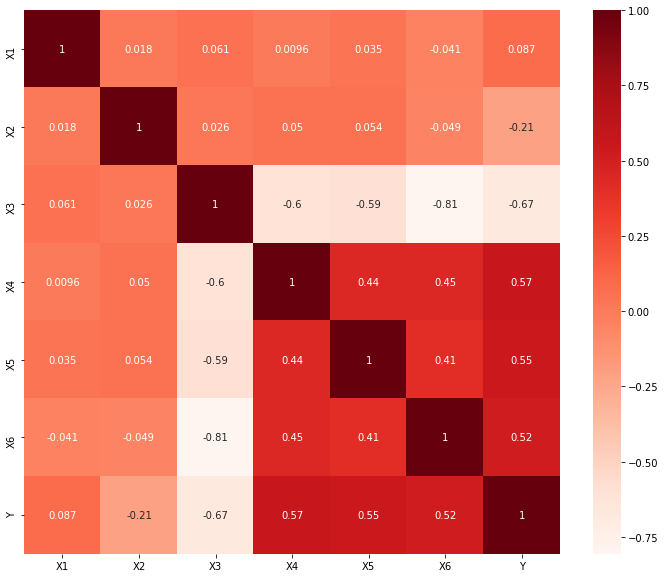

In [48]:
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [49]:
#Correlation with output variable
cor_target = abs(cor["Y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

X3    0.673610
X4    0.571005
X5    0.546307
X6    0.523287
Y     1.000000
Name: Y, dtype: float64

In [50]:
print(df[["X3","X4"]].corr())
print(df[["X3","X5"]].corr())
print(df[["X3","X6"]].corr())
print(df[["X4","X5"]].corr())
print(df[["X4","X6"]].corr())
print(df[["X5","X6"]].corr())

          X3        X4
X3  1.000000 -0.602516
X4 -0.602516  1.000000
          X3        X5
X3  1.000000 -0.591066
X5 -0.591066  1.000000
          X3        X6
X3  1.000000 -0.806317
X6 -0.806317  1.000000
          X4        X5
X4  1.000000  0.444143
X5  0.444143  1.000000
          X4        X6
X4  1.000000  0.449099
X6  0.449099  1.000000
          X5        X6
X5  1.000000  0.412924
X6  0.412924  1.000000


In [53]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


# X = df[['X4', 'X5', 'X6']].values
# X = df[['X1', 'X2', 'X3', 'X4']].values
Y = df[['Y']].values

# x_train, x_test, y_train, y_test = train_test_split(
#     preprocessing.minmax_scale(X),
#     preprocessing.minmax_scale(Y),
#     test_size=0.3,
# )

x_train, x_test, y_train, y_test = train_test_split(
    preprocessing.minmax_scale(X),
    Y,
    test_size=0.2,
)


# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# y_test

In [54]:
df = df['Y']
df.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y, dtype: float64

In [55]:
y_test.shape

(83, 1)

In [59]:
!pip install neupy

     |████████████████████████████████| 235kB 5.5MB/s 
     |████████████████████████████████| 92.6MB 1.2MB/s 
     |████████████████████████████████| 368kB 37.2MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 3.2MB 39.2MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0


In [60]:
from neupy import algorithms

regression = algorithms.GRNN(std=0.2, verbose = True)
regression.fit(x_train, y_train)
regression

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 


Main information

[ALGORITHM] GRNN

[OPTION] std = 0.2
[OPTION] verbose = True



GRNN(verbose=True, std=0.2)

In [61]:
y_predicted = regression.predict(x_test)
# y_predicted

In [62]:
# df = df.round({'X1': 3, 'X2': 1, 'X3': 1})

df = pd.DataFrame({'Actual' : y_test[:, 0],'Predicted': y_predicted[:, 0]})
df.head(3)

,Actual,Predicted
0,36.7,40.416713
1,23.2,28.470310
2,30.6,31.552905


In [65]:
import numpy as np
mse = np.mean((y_predicted - y_test) ** 2)
mse

45.81274543850871

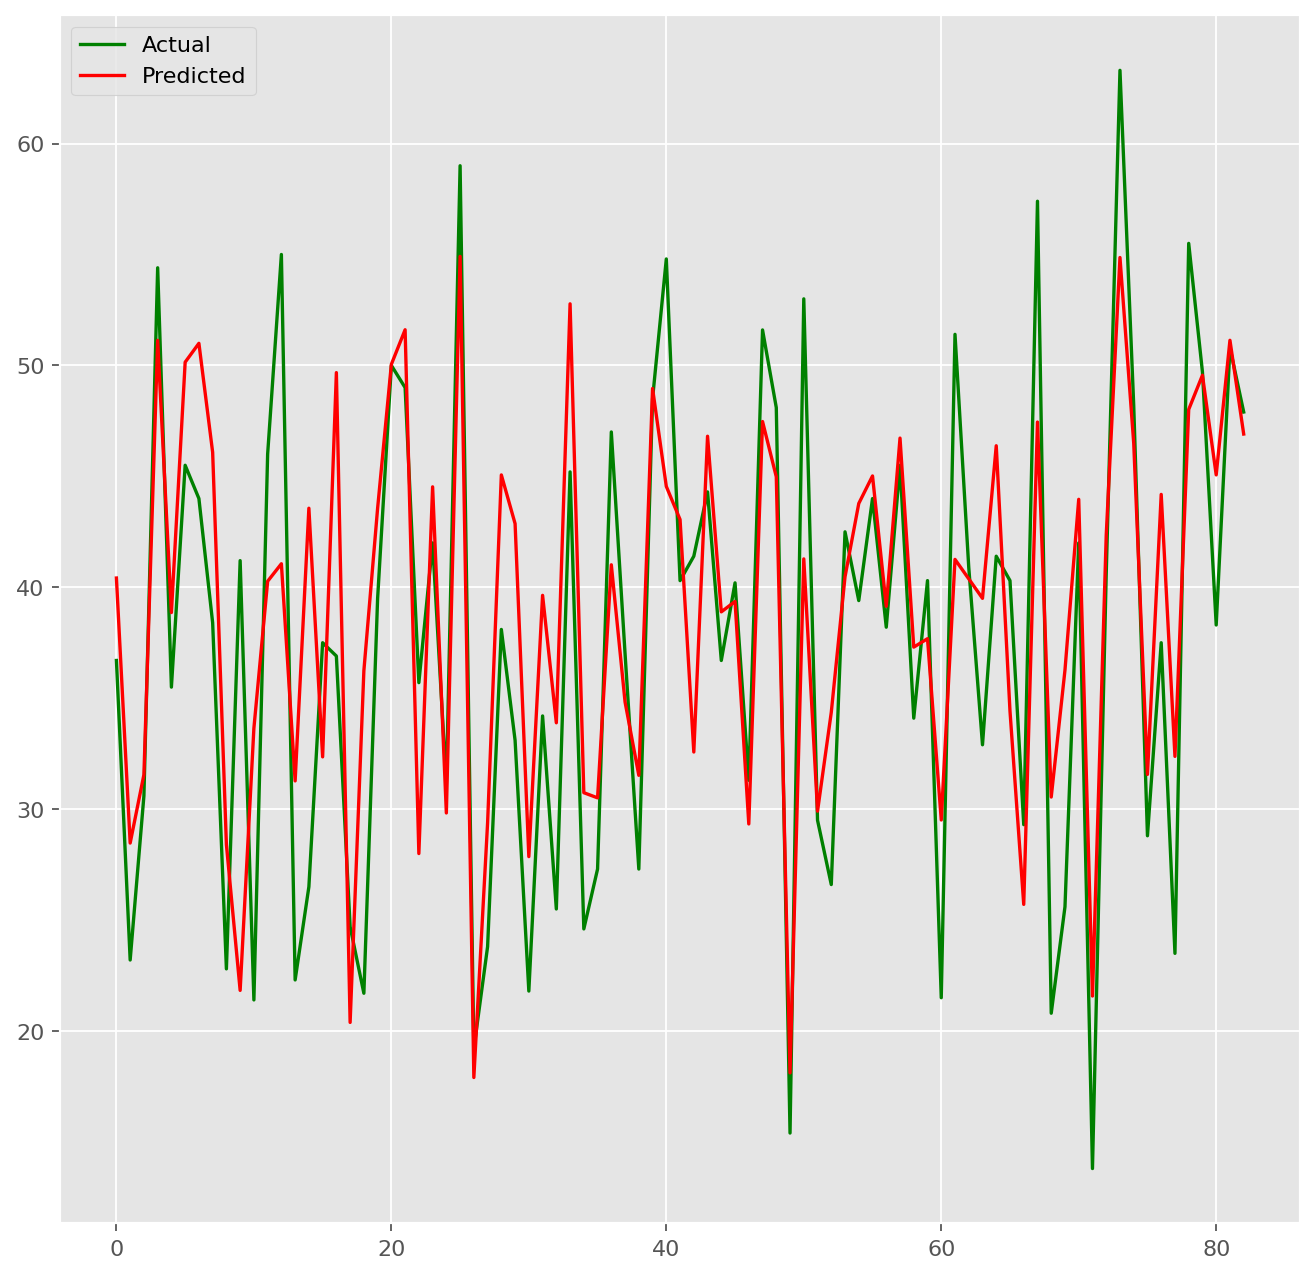

In [66]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(num=None, figsize=(10, 10), dpi=160, facecolor='w', edgecolor='w')

plt.style.use('ggplot')
plt.plot(df['Actual'], 'g', label = 'Actual')
plt.plot(df['Predicted'], 'r', label = 'Predicted')

plt.legend()
plt.show()

In [67]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 5.440066890532421
Mean Squared Error: 45.81274543850871
Root Mean Squared Error: 6.768511316272487
